# The Sparks Foundation - GRIP TASK#1
## Prediction using Supervised ML 
##  - Akshata Kale


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing data

In [2]:
data=pd.read_csv('http://bit.ly/w-data')
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data visualisation
  We will plot correlation graph to find relationship between variables.
  Also, Graph of distribution of score along with variable relationship will give the idea of outliers if exists any.

Text(0.5, 1, 'correlation map')

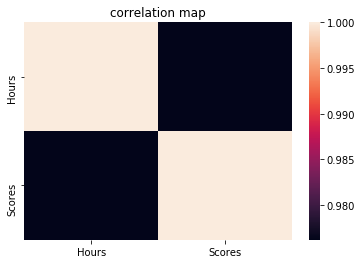

In [4]:
sns.heatmap(data.corr())
plt.title('correlation map')

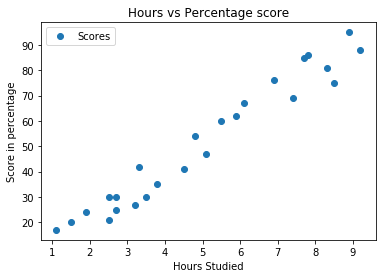

In [5]:
data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage score')  
plt.xlabel('Hours Studied')  
plt.ylabel( 'Score in percentage')  
plt.show()

Hence from above graphs it is clear that there is linear relashionship and positive correlation between variables and there are no outliers

## Data Preparation

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

## Splitting data into train data and test data

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Algorithm Training

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

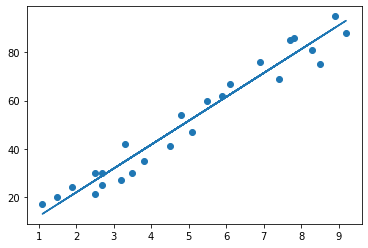

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Model Prediction

In [10]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # score prediction - In percentage

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual data vs Predicted data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## We want to find out scores(in %) of students who study 9.25 hours/day
## SO,we test our model for 9.25 hours

In [12]:
#testing for 9.25 hours
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Hence students who study 9.25 hours/day are predicted to score 93.69%

# Model Evaluation
   To check optimality of algorithm performance we will evaluate the model using method of mean square error.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


Hence, the algorithm performance is optimum 